## 1. What is Tic Tac Toe ?

A fairly simple game which we have been playing since childhood. In case you are not familiar with the game you can read more about it [here](https://en.wikipedia.org/wiki/Tic-tac-toe) or watch this short video.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/USEjXNCTvcc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The simplicity of the game makes it very suitable for pedagogical purposes, that is one of the reason why we find Tic-Tac-Toe so much in Artificial Intelligence literature.

We will discuss about making the computer learn to play Tic-Tac-Toe. We will start with very basic deterministic way of solving Tic-Tac-Toe and slowly move to making the computer LEARN to play Tic-Tac-Toe. We will also examine some of our own strategies while playing this game and can the computer learn these startegies. At times we must have come across a strategy, that putting a X or an O at the center always leads to draw and hence a safe move is to simply put an X or O at the center. 

## 2. ROTE Learning way (or the NOT so learning way)

One unique feature of this game is that it has less number of possible game states. A game state is a description of the positions of X's and O's at a given point in time in the game.

So the initial game state looks like the empty game figure. The next game state look like the figure corresponding to one of the possible game moves made by the first player, say X. Although there are 9 possible moves of which only 3 are distinct if we consider symmetry. All these game states cane be depicted in form of a [game tree](https://en.wikipedia.org/wiki/Game_tree) . Game trees allow us to enumerate all possible scenarios in the game. Take look at the figure below for game tree associated with Tic-Tac-Toe.

![Gamge States](https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Tic-tac-toe-game-tree.svg/545px-Tic-tac-toe-game-tree.svg.png)

There are some states which are losing and some other states which are winning. You might have guessed the meaning, but let us define it more rigorously. A state is called winning for *X* if either of the following holds true:
1. Player *X* has won the game. (the obvious win)
2. There exists **NO** such path in the tree (sub-tree) starting from the given state which will **NOT** land player <i>X</i> in an obvious win state as described in 1. (Or we can say every path will land player *X* into an obvious win state)

In an analogous way we can define winning states for O's. Similarly we can also defining a losing state. (try defining losing state precisely) 

### 2.1 The ROTE Learning approach

As the name suggest this is very straight forward. Make a tree and figure out all winning states and losing states for a given player. If it is a winning state give a high score to the player, if it is a losing state give a penalizing score and if it is neither then give a zero.

---
***Algorithm 2.1.1***

GetStateScore(**state**, **player**):
1. **GameTree** $\leftarrow$ A representation of game tree.
2. **If** **state** is winning for **player** in **GameTree**:
   - **Then** **return** 100
   - **Else If** **state** is losing for **player** in **GameTree**:
       - **Then** **return** -100
   - **Else**
       - **return** 0

---

The actual difficulty in the above algorithm is figuring out if a state is winning or not. One possible way, is to use the game tree itself and ensure that all path in all subtrees starting from the given state, ends up making the given player win. This is again relatively straight forward if you are familiar with [graph theory](https://en.wikipedia.org/wiki/Graph_theory) and [BFS](https://en.wikipedia.org/wiki/Breadth-first_search) or [DFS](https://en.wikipedia.org/wiki/Depth-first_search).

## 3. The Minimax way

If you have heard of the minimax algorithm then this is probably one of the most widely used ways to solve this type of problems. The core idea of this class of algorithm is to make sure that you always consider your opponents best possible moves before making yours. As the name suggests, Min-Max, find the minimum of the maximum possible score of your opponent or in other words minimize your damage in worst case.

There is another version of the same algorithm which is maximizing the minimum gain. In case of Tic-Tac-Toe we try and do exactly the same thing. Maximize the minimum gain. This allows us to consider the other player's optimal moves.

---

***Algorithm 3.1.1***

GetMaxScore(**currentState**, **currentPlayer**):

1. **If** **currentState** is winning for **currentPlayer**:
    - **Then** **return** 100 
2. **If** **currentState** is losing for **currentPlayer**:
    - **Then** **return** -100
3. **If** **currentState** is a draw:
    - **Then** **return** 0
3. **Else**
    - **nextPlayer** $\leftarrow$ Get next player from **currentPlayer**
    - **possibleStates** $\leftarrow$ Get all possible next states from the **currentState**
    - **return** $$\max_{\forall \; s \; \in \; possibleStates}(-GetMaxScore(s, nextPlayer))$$

---

The algorithm 3.1.1 works because it considers the negative scores for the other player, hence effectively maximizing the minimum gains.
Below we have a working example in python for the above algorithm.

In [2]:
import math
import copy
import typing
import random

def get_winner(state) -> str:
    for i in range(3):
        if state[i][0] == state[i][1] == state[i][2] and \
        (state[i][0] == 'O' or state[i][0] == 'X'):
            return state[i][0]
        if state[0][i] == state[1][i] == state[2][i] and \
        (state[0][i] == 'O' or state[0][i] == 'X'):
            return state[0][i]
    if state[0][0] == state[1][1] == state[2][2] and \
    (state[0][0] == 'O' or state[0][0] == 'X'):
        return state[0][0]
    if state[0][2] == state[1][1] == state[2][0] and \
    (state[0][2] == 'O' or state[0][2] == 'X'):
        return state[0][2]
    return '_'

def flip_player(player):
    if player == 'X':
        return 'O'
    else:
        return 'X'

class MinMaxPlayer:
    cache = [None]*(2**19) # Eases the recursion, creating big enough cache to avoid resizing
    def __init__(self, symbol : str):
        self.symbol = symbol
        
    def get_score(self, i, j, state): # Gets the score if player with symbol makes a move at i, j
        return MinMaxPlayer._get_score(0, i, j, self.symbol, state)
    
    @staticmethod
    def _get_score(move, i, j, player, state):
        state = copy.deepcopy(state)
        state[i][j] = player
        hash = MinMaxPlayer._get_hash(player, state)
        prev = MinMaxPlayer.cache[hash]
        if prev != None:
            return prev # Don't recompute score if already computed
        winner = get_winner(state)
        score = -math.inf
        if winner == player:
            score = 100
        elif winner == '_' and move <= 8:
            max_score = -math.inf
            for l in range(3):
                for m in range(3):
                    if state[l][m] == '_':
                        max_score = max(max_score, MinMaxPlayer._get_score(move + 1, l, m, flip_player(player), state))
            score = -max_score if max_score != -math.inf else 0
        elif winner == '_' and move > 8:
            score = 0
        else:
            score = -100
        MinMaxPlayer.cache[hash] = score
        return score

    @staticmethod
    def _get_hash(symb, state):
        hash = 0
        to_match = 'X'
        for q in range(2):
            for p in range(9):
                (i, j) = (p//3, p%3)
                to_match = 'X' if q == 0 else 'O'
                hash = hash * 2 + (1 if state[i][j] == to_match else 0)
        hash = hash * 2 + (0 if symb == 'X' else 1)
        return hash

In [3]:
player_x = MinMaxPlayer('X')
player_o = MinMaxPlayer('O')

state1 = [
    ['_', 'X', 'X'],
    ['_', 'O', '_'],
    ['_', 'O', '_']    
]

state2 = [
    ['O', 'X', 'X'],
    ['_', 'O', '_'],
    ['O', '_', 'X']    
]

print(player_x.get_score(0, 0, state1)) # 'X' will win if it makes the move at 0,0 so score is 100
print(player_o.get_score(2, 2, state1)) # 2,2  is really a bad move for 'O' so score is -100
print(player_o.get_score(1, 2, state2)) # move 1,2 for 'O' will eventually lead to a draw so score is 0
print(player_x.get_score(1, 0, state2)) # move 1,0 for 'X' will eventually lead to a draw so score is 0

100
-100
0
0


## 4. The Learning Way

Now that we have seen various deterministic ways of solving the problem, we can try something which is more like learning Tic-Tac-Toe. The methods discussed previously will in worst case generate all possible states and assign scores to each state. Even though applying machine learning to a problem which can solved without much complexity deterministically doesn't add much advantage. But it can a be good problem for learning ML and for other pedagogical purposes.

### 4.1 The Data

Before starting to solve any problem the ML way we need data. We can generate the data using the deterministic algorithms discussed previously. Now at this point you can call it unfair because we are consuming the data previously available from playing Tic-Tac-Toe with the best player. Towards the end of this section we will discuss a Q-Learning approach to solving this problem and there we won't use any previous data.

So lets take a look at the data. Here, we have represented the game state using variables $X_{i} \; \forall \; 0 \le i \le 8$ ; $O_{i} \; \forall \; 0 \le i \le 8$; $IsO$; and $score$. $X_{i}$ tells whether there is symbol *'X'* at position $i$, similarly $O_{i}$ tells whether there is symbol *'O'* at position $i$. In case both $O_i$ and $X_i$ are zero then position $i$ is empty. $IsO$ tells if $O$ made the last move.

|...|...|...|
|---|---|---|
| 0 | 1 | 2 |
| 3 | 4 | 5 |
| 6 | 7 | 8 |

***Table 4.1.1:*** This shows the different positions of $i$ with respect to the locations on actual Tic-Tac-Toe matrix.


In [4]:
import pandas as pd
data = pd.read_csv("ticTacToeScore.csv")
data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,O0,O1,O2,O3,O4,O5,O6,O7,O8,IsO,score
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Let's consider the $12^{th}$ data point.

In [5]:
data.iloc[[11]]

,X0,X1,X2,X3,X4,X5,X6,X7,X8,O0,O1,O2,O3,O4,O5,O6,O7,O8,IsO,score
11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,-100


The $12^{th}$ data point represents the following Tic-Tac-Toe state:

|...|...|...|
|---|---|---|
| _ | _ | _ |
| _ | _ | _ |
| _ | O | X |

$IsO$ is 1 indicating that last turn was with $O$ and $score$ is -100 indicating that $O$ will definitely lose given $X$ plays optimally. We can actually see that's true because in the next move 'X' can actually mark at position $2$,

|...|...|...|
|---|---|---|
| _ | _ | X |
| _ | _ | _ |
| _ | O | X |

forcing $O$ to mark at position $5$. 

|...|...|...|
|---|---|---|
| _ | _ | X |
| _ | _ | O |
| _ | O | X |

After that $X$ makes a move at position $0$, trapping $O$ and making it lose the game.

|...|...|...|
|---|---|---|
| X | _ | X |
| _ | _ | O |
| _ | O | X |

Clearly our dataset is good and it represents the actual game states and their corresponding scores accurately.

In all there are $5478$ distinct possible valid states in a Tic-Tac-Toe. A trivial analysis can tell us that maximum number of cases will be capped by $3^9 = 19683$ because every position possible can take three different values ($X$, $O$ or $\_$ ), but this clearly is not the best estimate as out of 19683 only 5478 are possible. This also tells us why a representation consisting of more columns, having $blank_{i}$ similar to $X_{i}$s and $O_{i}$s to represent $\_$, is not a good idea. It will increase the space in which the learning algorithm has to search for solution. Our current representation has 19 binary columns and hence the search space is constrained by $2^{19} = 524288$ size. But if we have more columns, considering $blank_{i}$ as binary columns, then the total search space size increases to $2^{28} = 268435456$. There are some other possible representations like having 9 columns, one for each position, each of which can contain three values ($0$ for $X$, $1$ for $O$ and $2$ for $\_$ ). It is not hard to see that this representation is bad because it is attaching a weighted preference to each of possible outcomes ($X$, $O$ or $\_$ ). It will make it hard for some of the simple algorithms like **logistic regression** to extract the meaning from this representation, even for complex models such as **ANN**s it may take more time to converge. So a good representation is one which allows us to represent data in a simple form and at the same time not increasing the search space drastically. If you would have noticed the number of rows in our training data is $10954 = 2 * (5478 - 1)$. This is because there are two possible values of $IsO$ for every state and we are not considering empty state at all so $2 * (5478 - 1)$.

### 4.2 Preparing the Data

First we extract out the training data for 'X' and 'O' separately.

In [6]:
x_training_data_full = (data[(data.IsO == 0)]).drop(columns=["IsO", "score"])
o_training_data_full = (data[(data.IsO == 1)]).drop(columns=["IsO", "score"])
x_training_data_full.reset_index(drop=True, inplace=True)
o_training_data_full.reset_index(drop=True, inplace=True)
x_score_full = [score for score in data[(data.IsO == 0)]["score"]]
o_score_full = [score for score in data[(data.IsO == 1)]["score"]]

### 4.3 Linear Regression
Clearly we have some features and a score which we want to predict so how about trying Linear Regression first.

In [7]:
from sklearn.linear_model import LinearRegression
x_full_linear_reg_model = LinearRegression().fit(x_training_data_full, x_score_full)
x_full_linear_reg_acc = x_full_linear_reg_model.score(x_training_data_full, x_score_full)
o_full_linear_reg_model = LinearRegression().fit(o_training_data_full, o_score_full)
o_full_linear_reg_acc = o_full_linear_reg_model.score(o_training_data_full, o_score_full)

print("Function for X: ",x_full_linear_reg_model.coef_, " * state + ", x_full_linear_reg_model.intercept_)
print("Function for O: ", o_full_linear_reg_model.coef_, " * state + ", o_full_linear_reg_model.intercept_)
print("Accuracy for X = {}, Accuracy for O = {}"
      .format(x_full_linear_reg_acc, o_full_linear_reg_acc))

Function for X:  [ 69.71383658  48.3715394   69.71383658  48.3715394   95.21678634
  48.3715394   69.71383658  48.3715394   69.71383658 -48.13167897
 -35.40737807 -48.13167897 -35.40737807 -53.08796566 -35.40737807
 -48.13167897 -35.40737807 -48.13167897]  * state +  -107.77964267296042
Function for O:  [-48.13167897 -35.40737807 -48.13167897 -35.40737807 -53.08796566
 -35.40737807 -48.13167897 -35.40737807 -48.13167897  69.71383658
  48.3715394   69.71383658  48.3715394   95.21678634  48.3715394
  69.71383658  48.3715394   69.71383658]  * state +  -107.77964267296349
Accuracy for X = 0.2359100795453818, Accuracy for O = 0.23591007954538165


We get a very bad training accuracy of just $23.5\%$ . But if you notice the function for $X$ and $O$ have coefficients which are opposite in sign. It means that the move which makes $X$ win is bad for $O$. But is this data good enough for a linear model to work ? Can we do better with the linear model ?

Let's try and reduce the dimension. One may also want to do scaling, but it is not of much use as we only have binary columns.

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x_pca2_training_data = PCA(n_components=2).fit_transform(x_training_data_full)

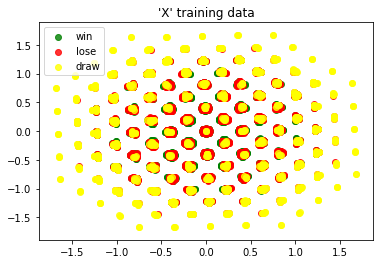

In [9]:
import numpy as np
x_pca2_training_data_win = np.array([x_pca2_training_data[idx] for idx, score in enumerate(x_score_full) if str(x_score_full[idx]) == "100"]) 
x_pca2_training_data_lose = np.array([x_pca2_training_data[idx] for idx, score in enumerate(x_score_full) if str(x_score_full[idx]) == "-100"]) 
x_pca2_training_data_draw = np.array([x_pca2_training_data[idx] for idx, score in enumerate(x_score_full) if str(x_score_full[idx]) == "0"]) 
plt.scatter(x_pca2_training_data_win[:,0], x_pca2_training_data_win[:,1], color="green", label="win", alpha=0.8)
plt.scatter(x_pca2_training_data_lose[:,0], x_pca2_training_data_lose[:,1], color="red", label="lose", alpha=0.8)
plt.scatter(x_pca2_training_data_draw[:,0], x_pca2_training_data_draw[:,1], color="yellow", label="draw", alpha=0.8)
plt.title('\'X\' training data')
plt.legend()
plt.show()

The plot pretty much explains why Linear Regression performs so bad. But still is there a way to improve accuracy ? Even on such a complex decision boundary $23.5\%$ seems too bad. We will address this question later.

### 4.4 Decision Trees Regression

As we already saw the linear regression performed badly, so we will consider more complex models. So let us consider decision tree regression first.

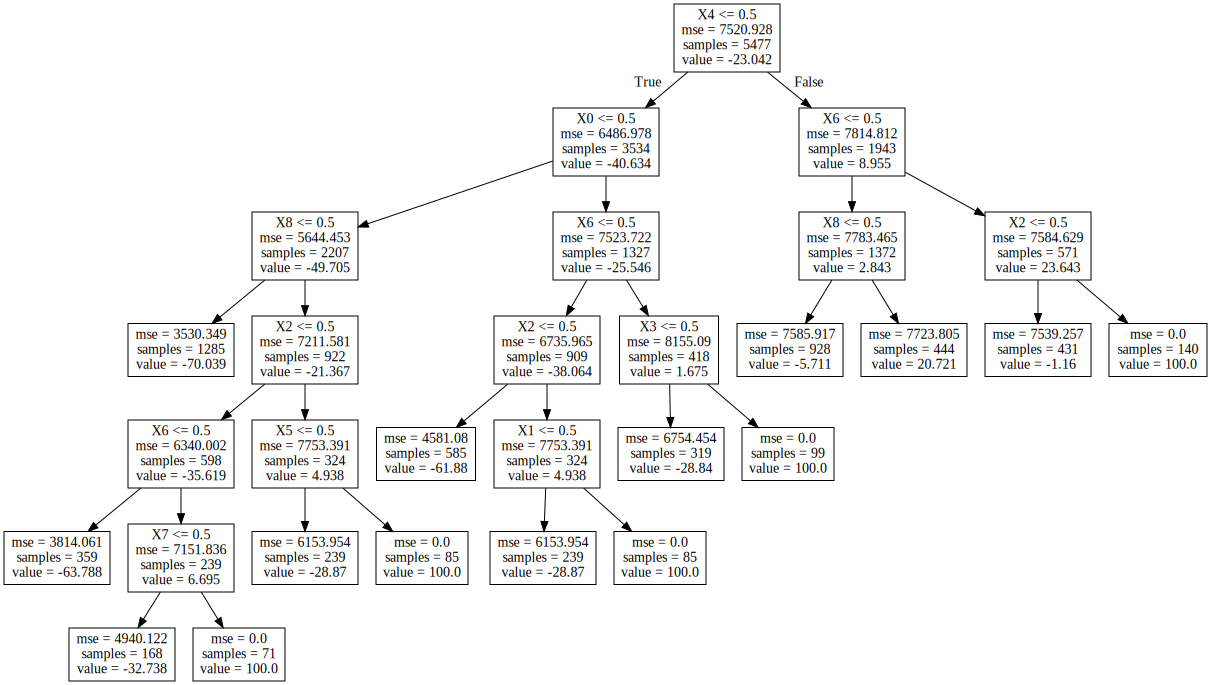

In [10]:
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from graphviz import Source
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#This will need installation of Graphviz to work

x_full_dt_reg_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=15).fit(x_training_data_full, x_score_full)
o_full_dt_reg_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=15).fit(o_training_data_full, o_score_full)
graph = Source(tree.export_graphviz(x_full_dt_reg_model, out_file=None, feature_names=x_training_data_full.columns))
graph

As you can see even with 15 nodes it is still checking the $X4$ value which is the center position. So one of our childhood assumptions that putting a mark at the center takes a game towards draw is not without a reason. But of course this particular decision tree doesn't have a good accuracy. In fact the accuracy improves with the number of nodes in the decision tree and after a certain number of nodes it saturates to 1 when the decision tree overfits the training data.

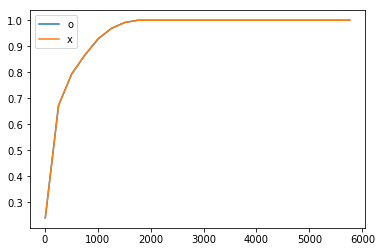

In [11]:
x_full_dt_reg_acc = []
o_full_dt_reg_acc = []
num_nodes = [i for i in range(10, 6000, 250)]

for i in num_nodes:
    x_full_dt_reg_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=i).fit(x_training_data_full, x_score_full)
    x_full_dt_reg_acc.append(x_full_dt_reg_model.score(x_training_data_full, x_score_full))
for i in num_nodes:
    o_full_dt_reg_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=i).fit(o_training_data_full, o_score_full)
    o_full_dt_reg_acc.append(o_full_dt_reg_model.score(o_training_data_full, o_score_full))

plt.plot(num_nodes, x_full_dt_reg_acc, label='o')
plt.plot(num_nodes, o_full_dt_reg_acc, label='x')
plt.legend()
plt.show()

So as you can see the accuracy touches $1.0$ in both the plots around the same time. Around $1600$ nodes we have accuracy as $1.0$.One must also note that tic-tac-toe just has $765$ essentially different positions (no rotations or symmetry considered), which also hints that one will at least need that many nodes in the tree.

### 4.5 ANN Regression

Well how about apply neural networks to this problem. Since neural networks can solve complex problems with ease, so it should be a simple thing for **ANN Regression**.

In [12]:
from sklearn.neural_network import MLPRegressor
x_full_ann_reg_model = MLPRegressor(random_state=1, max_iter=3500, solver='lbfgs', early_stopping=True, activation='logistic').fit(x_training_data_full, x_score_full)
x_full_ann_reg_model.score(x_training_data_full, x_score_full)

0.773482169075109

Never expected **ANN** to be this bad, just $77.3\%$ ?

Usually ANN outperforms any other model is it a consequence of **[No free lunch theorem](https://en.wikipedia.org/wiki/No_free_lunch_theorem)** that the decision tree outperforms **ANN**. 

### 4.6 Fill the missing gap

What if model this as a classification problem rather than regression problem. The possible scores are anyways limited to three values $0$, $100$ and $-100$. All of them simply corresponds to three different scenarios. Sounds like an interesting idea. So let's convert our data to make it a classification problem.

In [13]:
x_class_full = [int(score/100 + 1) for score in x_score_full]
o_class_full = [int(score/100 + 1) for score in o_score_full]

#### 4.6.1 Logistic Regression

Let's replace the linear regression model with logistic regression and see what do we gain.

In [14]:
from sklearn.linear_model import LogisticRegression
x_full_logistic_reg_model = LogisticRegression(multi_class='auto', solver='lbfgs').fit(x_training_data_full, x_class_full)
x_full_logistic_reg_acc = x_full_logistic_reg_model.score(x_training_data_full, x_class_full)
o_full_logistic_reg_model = LogisticRegression(multi_class='auto', solver='lbfgs').fit(o_training_data_full, o_class_full)
o_full_logistic_reg_acc = o_full_logistic_reg_model.score(o_training_data_full, o_class_full)

print("Function for X: ",x_full_logistic_reg_model.coef_, " * state + ", x_full_logistic_reg_model.intercept_)
print("Function for O: ", x_full_logistic_reg_model.coef_, " * state + ", x_full_logistic_reg_model.intercept_)
print("Accuracy for X = {}, Accuracy for O = {}"
      .format(x_full_logistic_reg_acc, o_full_logistic_reg_acc))

Function for X:  [[-1.08117725 -0.77468022 -1.08117725 -0.77468022 -1.56284699 -0.77468022
  -1.08117725 -0.77468022 -1.08117725  0.91620433  0.64007097  0.91620433
   0.64007097  0.91947109  0.64007097  0.91620433  0.64007097  0.91620433]
 [-0.12796582  0.0266686  -0.12796582  0.0266686   0.0954271   0.0266686
  -0.12796582  0.0266686  -0.12796582 -0.42224774 -0.23918628 -0.42224774
  -0.23918628 -0.19057815 -0.23918628 -0.42224774 -0.23918628 -0.42224774]
 [ 1.20914307  0.74801161  1.20914307  0.74801161  1.46741989  0.74801161
   1.20914307  0.74801161  1.20914307 -0.49395659 -0.40088469 -0.49395659
  -0.40088469 -0.72889294 -0.40088469 -0.49395659 -0.40088469 -0.49395659]]  * state +  [ 1.61844104  0.56889277 -2.18733381]
Function for O:  [[-1.08117725 -0.77468022 -1.08117725 -0.77468022 -1.56284699 -0.77468022
  -1.08117725 -0.77468022 -1.08117725  0.91620433  0.64007097  0.91620433
   0.64007097  0.91947109  0.64007097  0.91620433  0.64007097  0.91620433]
 [-0.12796582  0.0266686

Wow!! The accuracy increased from $23.5\%$ to $60.1\%$. But this is not surprising. Converting a regression problem to classification problem allows more room for the algorithm to make mistakes. Regression creates artificial constraints on the problem making it more complex than needed.

#### 4.6.2 Decision Tree Classifier

Let's see if something improves in case of decision tree classification.

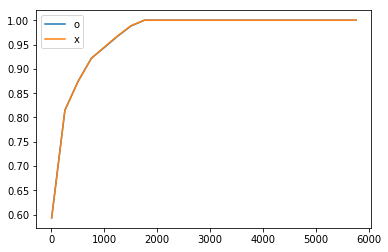

In [15]:
from sklearn.tree import DecisionTreeClassifier
x_full_dt_class_acc = []
o_full_dt_class_acc = []
num_nodes = [i for i in range(10, 6000, 250)]

for i in num_nodes:
    x_full_dt_class_model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=i).fit(x_training_data_full, x_class_full)
    x_full_dt_class_acc.append(x_full_dt_class_model.score(x_training_data_full, x_class_full))
for i in num_nodes:
    o_full_dt_class_model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=i).fit(o_training_data_full, o_class_full)
    o_full_dt_class_acc.append(o_full_dt_class_model.score(o_training_data_full, o_class_full))

plt.plot(num_nodes, x_full_dt_class_acc, label='o')
plt.plot(num_nodes, o_full_dt_class_acc, label='x')
plt.legend()
plt.show()

It seems like there is no effect as such. This kind of makes sense. Decision trees usually tend to overfit the training data itself and hence we cannot see any significant improvements here.

#### 4.6.3 Classification using Neural Networks

Let's see if converting it into neural network classification problem improves accuracy.


In [16]:
from sklearn.neural_network import MLPClassifier
x_full_ann_class_model = MLPClassifier(random_state=1, max_iter=1000, activation='relu').fit(x_training_data_full, x_class_full)
o_full_ann_class_model = MLPClassifier(random_state=1, max_iter=1000, activation='relu').fit(o_training_data_full, o_class_full)

In [18]:
x_full_ann_class_acc = x_full_ann_class_model.score(x_training_data_full, x_class_full)
o_full_ann_class_acc = o_full_ann_class_model.score(o_training_data_full, o_class_full)
print("Accuracy for X = {}, Accuracy for O = {}"
      .format(x_full_ann_class_acc, o_full_ann_class_acc))

Accuracy for X = 1.0, Accuracy for O = 1.0


Finally we have something, the accuracy is 1 now!! Neural Networks learns to play Tic-Tac-Toe. We can finally brag about it.

## 4.7 The fair way

Till this point we have considered that we have scores corresponding to all states and we have used all of it as training data. In true sense this is not really ML. So ideally do a divide between test and train. Also, in real world the problems are complex enough and we might not even have any way to compute these scores.

### \[More Coming Soon\]